## Importing Libraries

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [219]:
data=pd.read_csv("train.csv")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [220]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [221]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [222]:
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [223]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [225]:
#Explore unique values in categorical columns====
categorical_columns=data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].value_counts()

In [226]:
# Check the proportion of missing values
print("\nProportion of Missing Values in Each Column:")
print((data.isnull().sum() / len(data)) * 100)


Proportion of Missing Values in Each Column:
Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64


In [227]:
#find the correlation  use corr() fun
data.select_dtypes(include='int').corr()

,Row ID
Row ID,1.0


In [228]:
#find the int columns
data.select_dtypes(include="integer").columns

Index(['Row ID'], dtype='object')

In [229]:
# find the object columns
data.select_dtypes(include="object").columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [230]:
# Sample random rows from the dataset
print("\nRandom Sample Rows:")
print(data.sample(5))


Random Sample Rows:
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
8682    8683  CA-2015-133634  05/11/2015  10/11/2015  Standard Class   
9675    9676  CA-2017-137393  06/05/2017  10/05/2017  Standard Class   
5741    5742  US-2018-147886  28/03/2018  31/03/2018     First Class   
3207    3208  CA-2015-158372  10/11/2015  16/11/2015  Standard Class   
6705    6706  CA-2016-139164  23/06/2016  28/06/2016  Standard Class   

     Customer ID         Customer Name      Segment        Country  \
8682    SR-20740         Steven Roelle  Home Office  United States   
9675    GM-14500          Gene McClure     Consumer  United States   
5741    DH-13075         Dave Hallsten    Corporate  United States   
3207    RD-19900           Ruben Dartt     Consumer  United States   
6705    CS-12355  Christine Sundaresam     Consumer  United States   

             City       State  Postal Code Region       Product ID  \
8682    Arlington    Virginia      22204.0  South  TEC-

In [231]:
## finding the null values
data['Sales'].value_counts()

Sales
12.960     55
15.552     39
19.440     39
10.368     35
25.920     34
           ..
339.136     1
60.048      1
5.022       1
7.857       1
10.384      1
Name: count, Length: 5757, dtype: int64

In [232]:
from datetime import time


In [233]:
#converting the data into numerical format
data["Order Date"] = pd.to_datetime(data["Order Date"], format="%d/%m/%Y")
data["Ship Date"] = pd.to_datetime(data["Ship Date"], format="%d/%m/%Y")


In [234]:
#Suparating the year and month and day in order columns and ship column
data["Order Year"]=data["Order Date"].dt.year
data["Order Month"]=data["Order Date"].dt.month
data["Ship Year"]=data["Ship Date"].dt.year
data["Ship month"]=data["Ship Date"].dt.month

In [235]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Ship Year,Ship month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,2016,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,2017,5
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,2016,1
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1,2016,1
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,2016,1


In [236]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month', 'Ship Year',
       'Ship month'],
      dtype='object')

In [237]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Order Year        0
Order Month       0
Ship Year         0
Ship month        0
dtype: int64


## Day2: Data cleaning and preprocessing

In [238]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month', 'Ship Year',
       'Ship month'],
      dtype='object')

In [239]:
#check the null values
data.isnull().sum().sum()

11

In [240]:
#Handling the missing values
data['Postal Code'].fillna(data['Postal Code'].median(),inplace=True)

C:\Users\VISWA\AppData\Local\Temp\ipykernel_14808\2669166471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Postal Code'].fillna(data['Postal Code'].median(),inplace=True)


In [241]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Order Year       0
Order Month      0
Ship Year        0
Ship month       0
dtype: int64

In [242]:
# Romove unneccesary columns
data=data.dropna(axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [243]:
data.dropna(axis=1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Ship Year,Ship month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,11,2017,11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,11,2017,11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,6,2017,6
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,10,2016,10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,10,2016,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,2017,5
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,1,2016,1
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,1,2016,1
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,1,2016,1


In [244]:
data.isnull().sum().sum()

0

In [245]:
#check the duplicated values
data.duplicated().any()

False

In [246]:
## handle missing values
import pandas as pd
from sklearn.impute import SimpleImputer

In [247]:
# Check for missing values
data.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year,Order Month,Ship Year,Ship month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9796,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9797,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9798,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [248]:
# Romove unneccesary columns
data=data.drop('Product ID',axis =1 )

In [249]:
data=data.drop(['Row ID'],axis =1 )

In [250]:
data=data.drop('Customer Name',axis=1)

In [251]:
data=data.drop(['Customer ID'],axis =1 )

In [252]:
data=data.drop('Order ID',axis=1)

In [253]:
# Verify no missing values remain
print("Missing Values After:\n", data.isnull().sum())

Missing Values After:
 Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Order Year      0
Order Month     0
Ship Year       0
Ship month      0
dtype: int64


In [254]:
## detect and remove duplicates
# Check for duplicates
print("Duplicates before removal:", data.duplicated().sum())


Duplicates before removal: 1


In [255]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [256]:
# Confirm removal
print("Duplicates after removal:", data.duplicated().sum())

Duplicates after removal: 0


In [257]:
# Detect outliers using interquartile range (IQR) for the 'Sales' column
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Sales'] < (Q1 - 1.5 * IQR)) | (data['Sales'] > (Q3 + 1.5 * IQR))]
print("\nNumber of Outliers in 'Sales' Column:")
print(len(outliers))


Number of Outliers in 'Sales' Column:
1145


<Axes: >

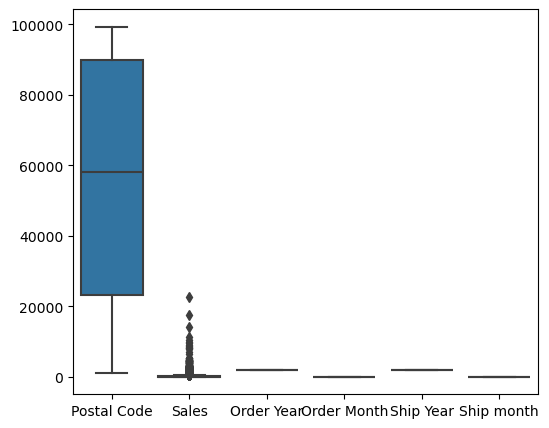

In [258]:
#out liers
plt.figure(figsize=(6,5))
sns.boxplot(data)

In [259]:
## Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [260]:
# import sklearn model
from sklearn.linear_model import LogisticRegression


In [261]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.select_dtypes(include="object"):
    data[i]=le.fit_transform(data[i])
    data

## Day3: Exploratory Data Analysis(EDA)

 1.Sales over time (Line plot)

In [262]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month', 'Ship Year',
       'Ship month'],
      dtype='object')

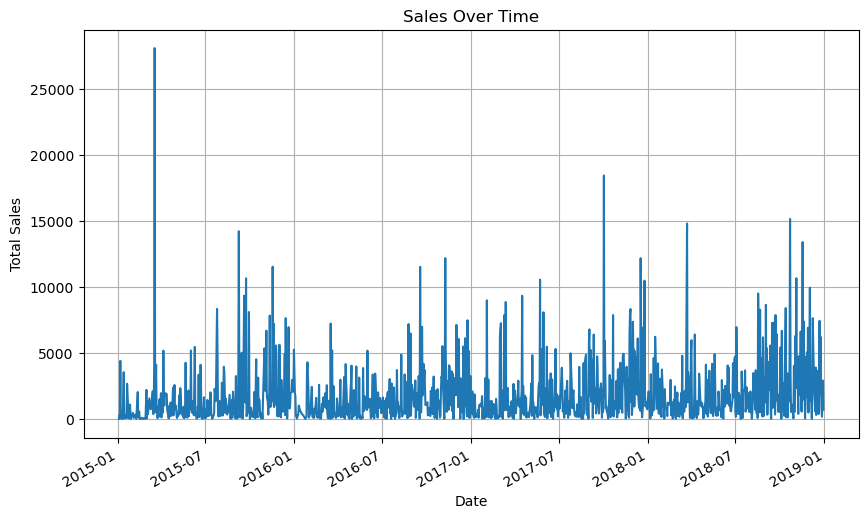

In [263]:
# Create a line plot of sales over time
plt.figure(figsize=(10,6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

2.Monthly Sales Trend (line Plot or Bar Plot)

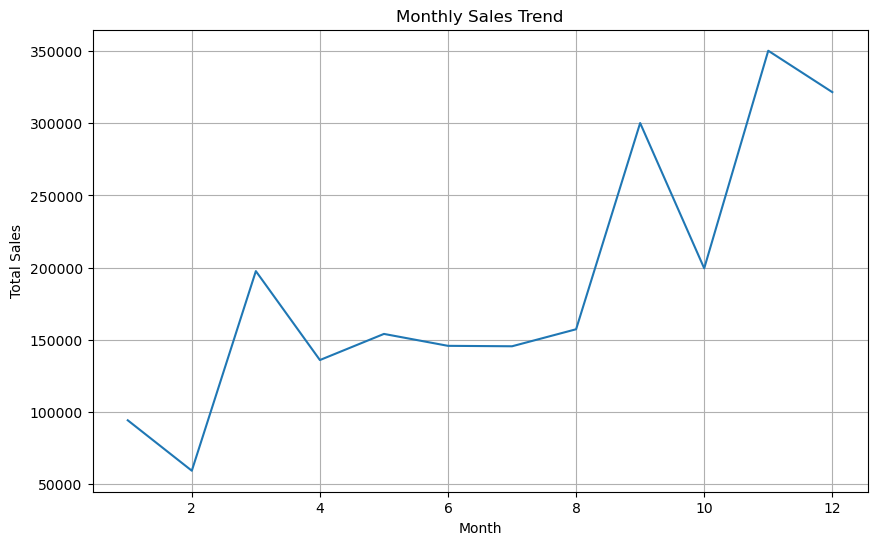

In [264]:
# Create line plot
monthly_sales=data.groupby('Order Month')['Sales'].sum()
plt.figure(figsize=(10,6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

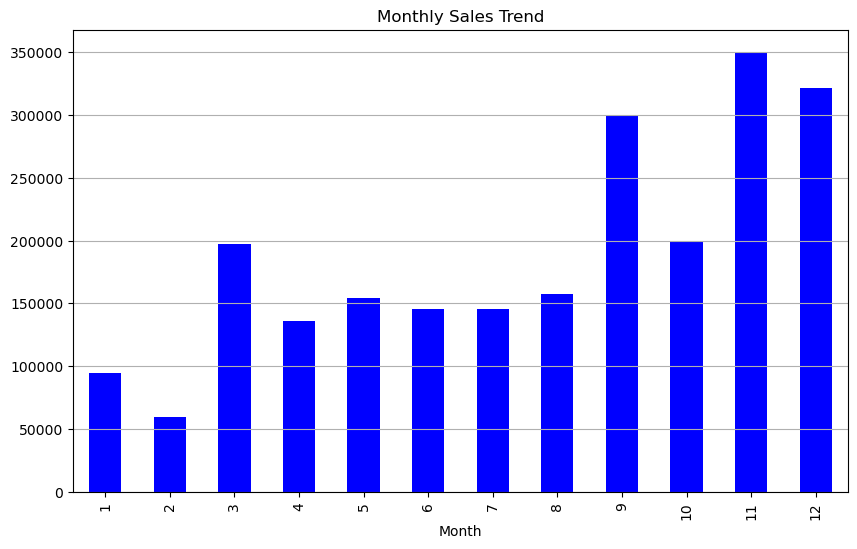

In [265]:
# Create bar plot
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar',color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.grid(axis='y')
plt.show()

3.Yearly Sales Trend(Bar Plot or Line Plot)

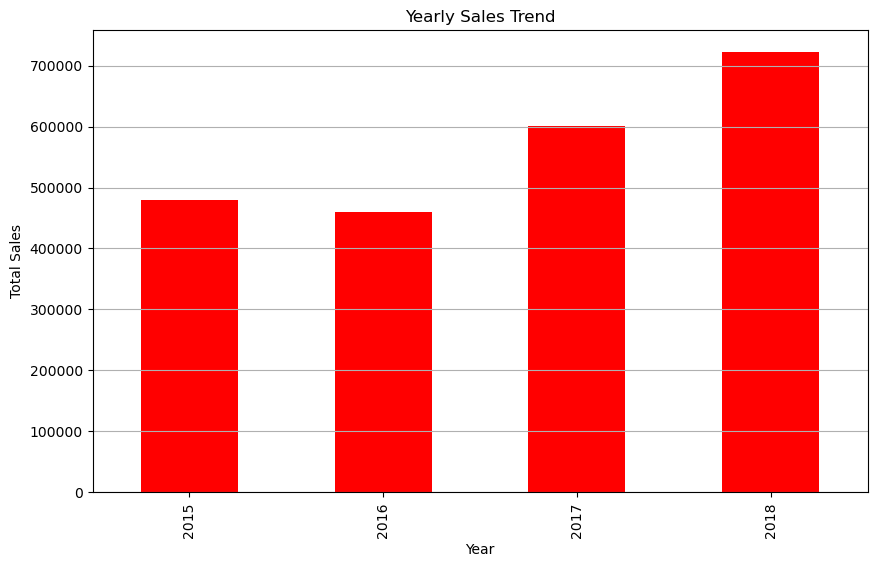

In [266]:
# Create  year bar plot
yearly_sales=data.groupby('Order Year')['Sales'].sum()
plt.figure(figsize=(10,6))
yearly_sales.plot(kind='bar',color='red')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

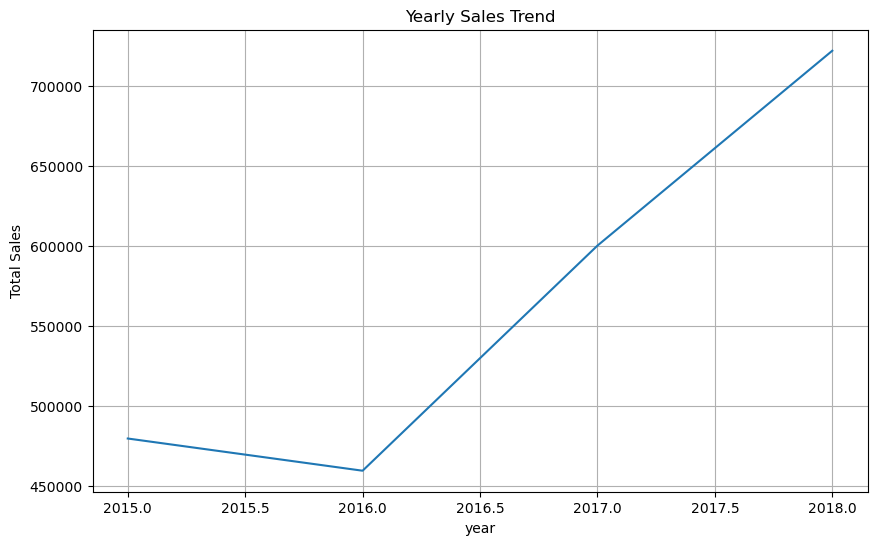

In [267]:
# Create year line plot
plt.figure(figsize=(10,6))
yearly_sales.plot()
plt.title('Yearly Sales Trend')
plt.xlabel('year')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

4.Sales By Day of the Week

In [268]:
data['DayOfWeek']=data['Order Date'].dt.day_name()

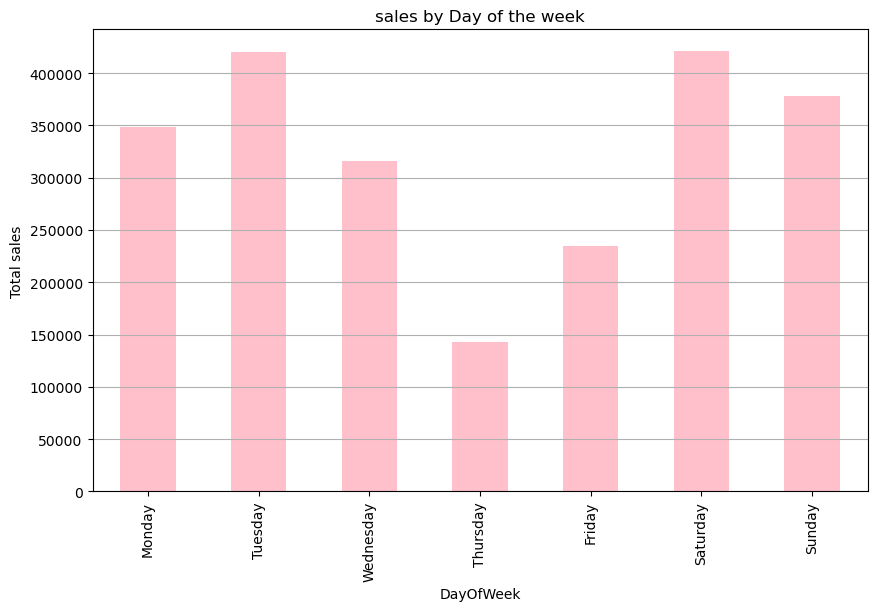

In [269]:
sales_by_day=data.groupby('DayOfWeek')['Sales'].sum().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.figure(figsize=(10,6))
sales_by_day.plot(kind='bar',color='pink')
plt.title('sales by Day of the week')
plt.ylabel('Total sales')
plt.grid(axis='y')
plt.show()

5.Category-Wise Sales Over Time

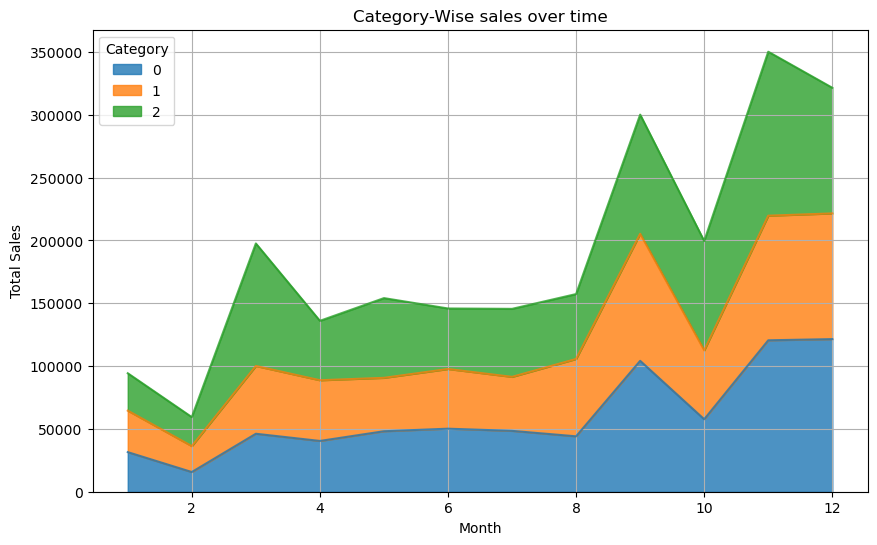

In [270]:
category_sales=data.groupby(['Order Month','Category',])['Sales'].sum().unstack()
#stacked Area Chart
category_sales.plot(kind='area',stacked=True,figsize=(10,6),alpha=0.8)
plt.title('Category-Wise sales over time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid()
plt.show()

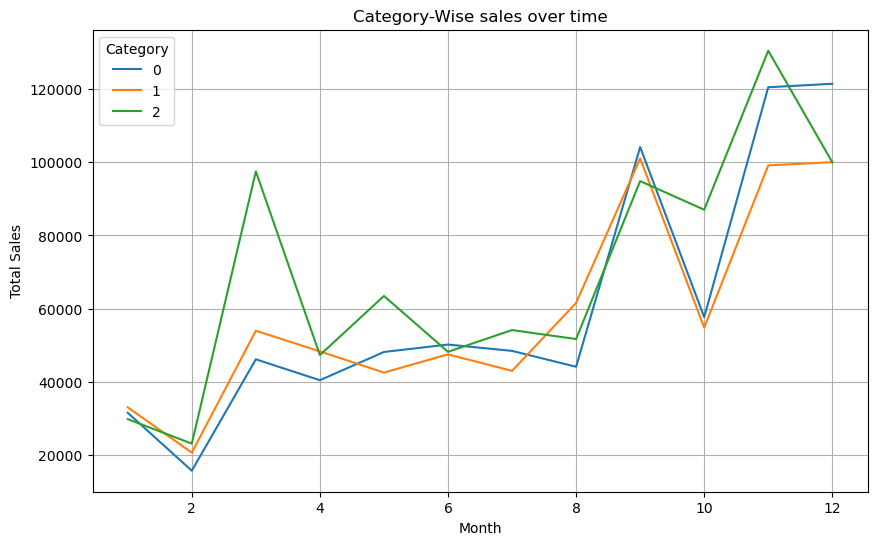

In [271]:
#Line plot 
category_sales.plot(figsize=(10,6))
plt.title('Category-Wise sales over time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid()
plt.show()

6.Sales by Ship Mode Over Time(Line Plot)

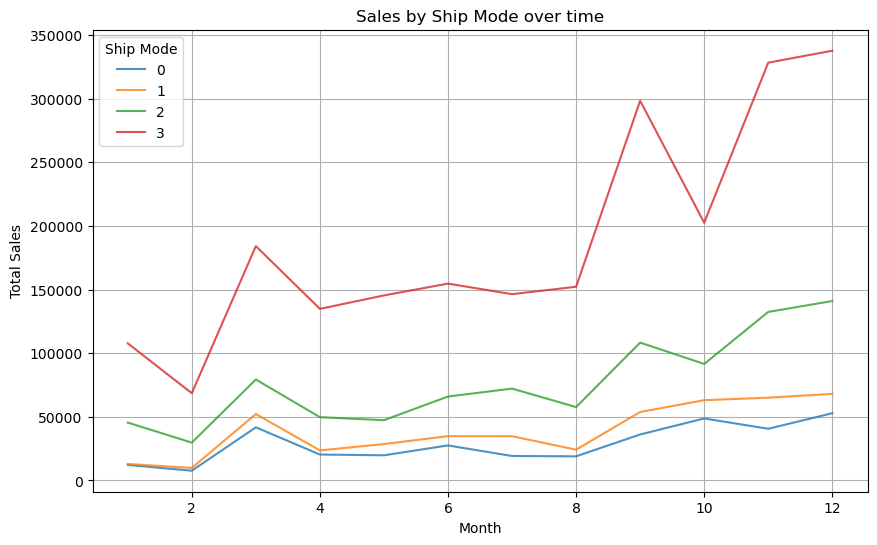

In [272]:
category_sales=data.groupby(['Ship month','Ship Mode',])['Sales'].sum().unstack()
category_sales.plot(figsize=(10,6), stacked=True,alpha=0.8)
plt.title('Sales by Ship Mode over time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Ship Mode')
plt.grid()
plt.show()

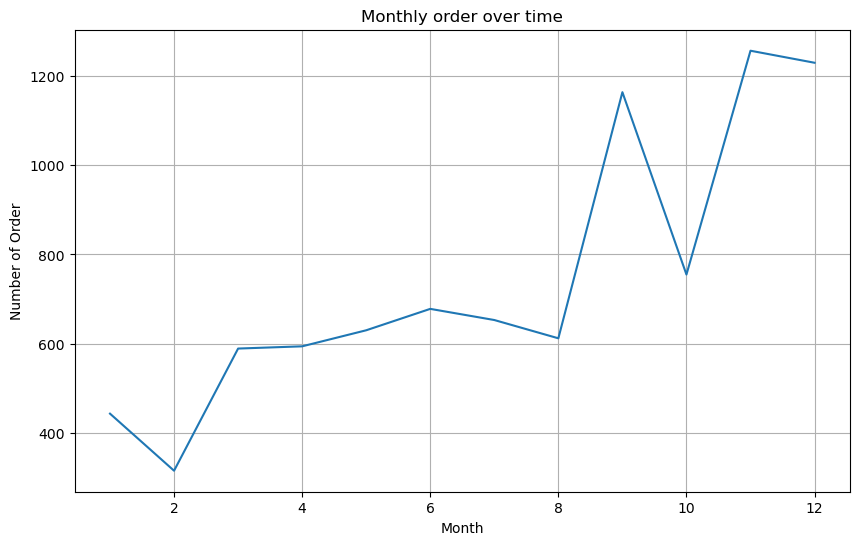

In [273]:
monthly_orders= data.groupby(['Ship month'])['Sales'].nunique()
plt.figure(figsize=(10,6))
monthly_orders.plot()
plt.title('Monthly order over time')
plt.xlabel('Month')
plt.ylabel('Number of Order')
plt.grid()
plt.show()

## Day 4 Model Building

In [274]:
data.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Order Year', 'Order Month', 'Ship Year',
       'Ship month', 'DayOfWeek'],
      dtype='object')

In [275]:
data['DayOfWeek'].value_counts().to_dict()

{'Tuesday': 1889,
 'Saturday': 1786,
 'Sunday': 1695,
 'Monday': 1593,
 'Wednesday': 1229,
 'Friday': 1067,
 'Thursday': 540}

In [276]:
data['DayOfWeek'] = data['DayOfWeek'].replace({
    'Tuesday': 3,
 'Saturday': 7,
 'Sunday': 1,
 'Monday': 2,
 'Wednesday': 4,
 'Friday': 6,
 'Thursday': 5})

C:\Users\VISWA\AppData\Local\Temp\ipykernel_14808\2572329353.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['DayOfWeek'] = data['DayOfWeek'].replace({


In [277]:
x=data[['Ship Year', 'Order Month','DayOfWeek']]
y=data[['Sales']]

In [278]:
x

,Ship Year,Order Month,DayOfWeek
0,2017,11,4
1,2017,11,4
2,2017,6,2
3,2016,10,3
4,2016,10,3
...,...,...,...
9795,2017,5,1
9796,2016,1,3
9797,2016,1,3
9798,2016,1,3


In [279]:
y

,Sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680
...,...
9795,3.7980
9796,10.3680
9797,235.1880
9798,26.3760


In [280]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)


In [281]:
x_train

,Ship Year,Order Month,DayOfWeek
9465,2017,11,1
3539,2015,5,7
6592,2016,4,7
8807,2018,10,6
9675,2017,5,7
...,...,...,...
5735,2015,6,2
5192,2015,11,7
5391,2015,11,5
860,2015,6,3


In [282]:
y_train

,Sales
9465,31.960
3539,20.650
6592,19.800
8807,33.282
9675,41.600
...,...
5735,13.920
5192,397.600
5391,22.500
860,7.360


In [283]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)

In [284]:
print(data.dtypes)  # Check the data types of each column


Order Date      datetime64[ns]
Ship Date       datetime64[ns]
Ship Mode                int32
Segment                  int32
Country                  int32
City                     int32
State                    int32
Postal Code            float64
Region                   int32
Category                 int32
Sub-Category             int32
Product Name             int32
Sales                  float64
Order Year               int32
Order Month              int32
Ship Year                int32
Ship month               int32
DayOfWeek                int64
dtype: object


In [285]:
print(x_train.dtypes)


Ship Year      int32
Order Month    int32
DayOfWeek      int64
dtype: object


In [286]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [287]:
pred=lr.predict(x_test)
pred

array([[231.60762252],
       [224.90625579],
       [215.57779093],
       ...,
       [219.99889591],
       [217.89728466],
       [233.38866414]])

In [288]:
print(lr.coef_)
print(lr.intercept_)

[[1.44796377 0.21788249 3.0111229 ]]
[-2710.41094111]


In [289]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=10,random_state=42)
rfc
rfc.fit(x_train,y_train)

c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=42)

In [290]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_estimators=10,random_state=42)
rfc
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
y_pred

c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([170.63933341, 126.56416265, 172.2760398 , ..., 212.27624717,
        78.33424259, 366.45589081])

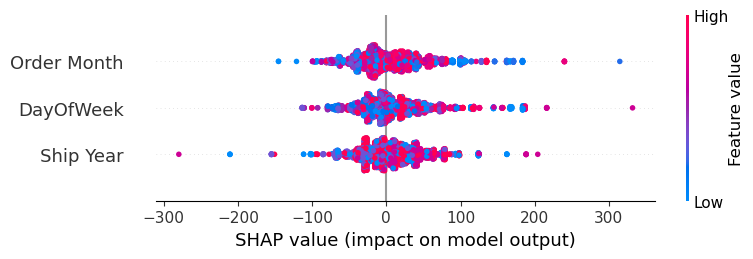

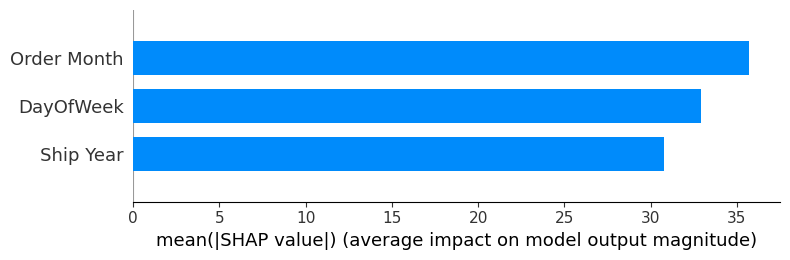

In [291]:
## linear reggression
import shap
import matplotlib.pyplot as plt
explainern=shap.TreeExplainer(rfc,x_train)
values =explainern(x_test)


shap.summary_plot(values,x_test)
shap.summary_plot(values,x_test,plot_type="bar")


In [292]:

rfc.fit(x_train,y_train)

c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=42)

In [293]:
y_pred=rfc.predict(x_test)
y_pred

array([170.63933341, 126.56416265, 172.2760398 , ..., 212.27624717,
        78.33424259, 366.45589081])

In [294]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=6,random_state=42)
dtr

DecisionTreeRegressor(max_depth=6, random_state=42)

In [295]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

[Text(0.42376373626373626, 0.9285714285714286, 'Order Month <= 1.5\nsquared_error = 319606.696\nsamples = 6859\nvalue = 222.805'),
 Text(0.16758241758241757, 0.7857142857142857, 'DayOfWeek <= 4.5\nsquared_error = 450926.583\nsamples = 256\nvalue = 273.713'),
 Text(0.10714285714285714, 0.6428571428571429, 'Ship Year <= 2017.5\nsquared_error = 345838.91\nsamples = 204\nvalue = 244.019'),
 Text(0.06043956043956044, 0.5, 'DayOfWeek <= 1.5\nsquared_error = 143847.565\nsamples = 128\nvalue = 204.218'),
 Text(0.03296703296703297, 0.35714285714285715, 'Ship Year <= 2016.5\nsquared_error = 91916.146\nsamples = 28\nvalue = 151.734'),
 Text(0.02197802197802198, 0.21428571428571427, 'Ship Year <= 2015.5\nsquared_error = 184806.731\nsamples = 12\nvalue = 271.598'),
 Text(0.01098901098901099, 0.07142857142857142, 'squared_error = 606.693\nsamples = 4\nvalue = 22.532'),
 Text(0.03296703296703297, 0.07142857142857142, 'squared_error = 230381.171\nsamples = 8\nvalue = 396.132'),
 Text(0.043956043956043

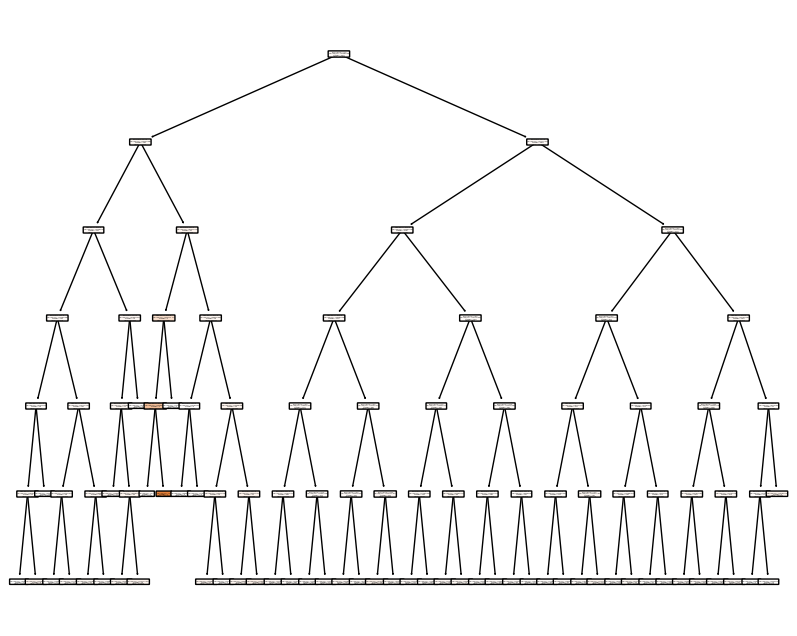

In [296]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(dtr,filled=True,feature_names=['Ship Year', 'Order Month','DayOfWeek'],class_names=['No.of.Sales'],rounded=True)

In [297]:
y_pred=dtr.predict(x_test)
y_pred

array([223.87872512, 220.07257538, 205.2269773 , ..., 202.61759006,
       166.30319881, 248.33625776])

In [298]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(r2_score)
print(mse)
print(mae)
print(rmse)

<function r2_score at 0x000002888A6FA3E0>
568419.5672097569
284.6239873082152
753.9360498144102


## Day-5: Model Building and Training

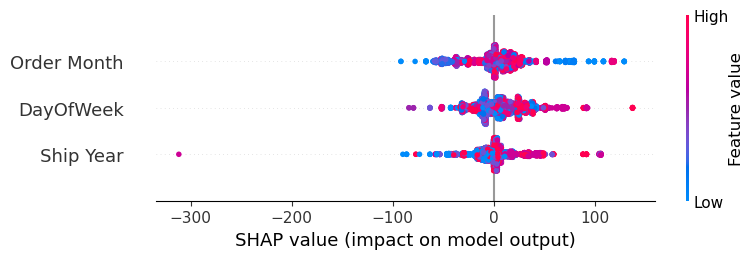

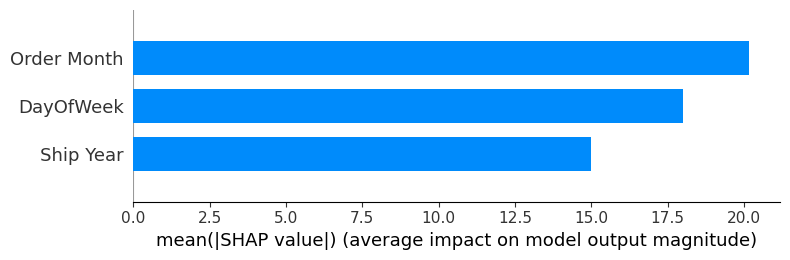

In [299]:
## linear reggression
import shap
import matplotlib.pyplot as plt
explainern=shap.Explainer(dtr,x_train)
values =explainern(x_test)


shap.summary_plot(values,x_test)
shap.summary_plot(values,x_test,plot_type="bar")
shap.initjs()
shap.force_plot(values[0].base_values,values[0].values,x_test.iloc[0])

In [300]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(n_estimators=10,random_state=42)
abr

AdaBoostRegressor(n_estimators=10, random_state=42)

In [301]:
abr.fit(x_train,y_train)

c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(n_estimators=10, random_state=42)

In [302]:
y_pred=abr.predict(x_test)
y_pred

array([289.22914978, 287.35794545, 566.65446771, ..., 369.69473864,
       218.40618273, 289.22914978])

In [303]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(r2_score)
print(mse)
print(mae)
print(rmse)

<function r2_score at 0x000002888A6FA3E0>
810631.9853711706
409.209051190245
900.351034525518


In [304]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [305]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x_train,y_train,scoring='r2',cv=5)
score

array([ 4.39760582e-05, -5.82347211e-05, -1.34054333e-03, -1.74146551e-03,
       -1.09549613e-04])

In [306]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
score

array([-204069.56368414, -318860.99375477, -270015.49059605,
       -513600.8663652 , -292588.63145353])

In [307]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
xg_pred=xg.predict(x_test)
xg_pred

array([175.13373 , 133.94148 , 172.44456 , ..., 209.29004 ,  75.107254,
       352.41583 ], dtype=float32)

In [308]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
xg_mae=mean_absolute_error(xg_pred,y_test)
print(xg_mae)
print("="*30)
xg_r2score=r2_score(y_test,xg_pred)
print(xg_r2score)
print("="*30)
xg_mse=mean_squared_error(y_test,y_pred)
print(xg_mse)
print("="*30)
xg_mae=mean_absolute_error(y_test,y_pred)
print(xg_mae)
print("="*30)
#cross_validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(xg,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
score


290.44737261371483
-0.0264555425935169
810631.9853711706
409.209051190245


array([-223426.8186978 , -338678.31282003, -295633.60925468,
       -530262.56663382, -321383.44686212])

In [309]:
x_train

,Ship Year,Order Month,DayOfWeek
9465,2017,11,1
3539,2015,5,7
6592,2016,4,7
8807,2018,10,6
9675,2017,5,7
...,...,...,...
5735,2015,6,2
5192,2015,11,7
5391,2015,11,5
860,2015,6,3


In [310]:
y_train

,Sales
9465,31.960
3539,20.650
6592,19.800
8807,33.282
9675,41.600
...,...
5735,13.920
5192,397.600
5391,22.500
860,7.360


In [311]:
pip show scikit-learno 

Note: you may need to restart the kernel to use updated packages.


In [312]:
pip install scikit-learn==1.2.2


Note: you may need to restart the kernel to use updated packages.


In [313]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'x' and 'y' are defined (Pandas DataFrame/Series)
# Normalize the data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Convert 'y' to numpy array and reshape it for scaling
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Reshape 'x' for LSTM input (LSTM expects 3D input: [samples, timesteps, features])
x_reshaped = np.reshape(x_scaled, (x_scaled.shape[0], 1, x_scaled.shape[1]))

# Train-test split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_reshaped, y_scaled, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))  # Output layer for regression
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(Xtrain, ytrain, epochs=50, batch_size=32, validation_data=(Xtest, ytest), verbose=1)

# Make predictions
y_pred_scaled = model.predict(Xtest)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Inverse transform predictions to original scale
ytest_original = scaler_y.inverse_transform(ytest)  # Inverse transform true values to original scale

# Evaluate the model
r2 = r2_score(ytest_original, y_pred)
mae = mean_absolute_error(ytest_original, y_pred)
mse = mean_squared_error(ytest_original, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

Epoch 1/50


c:\Users\VISWA\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7.3506e-04 - val_loss: 0.0011
Epoch 2/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.3381e-04 - val_loss: 0.0011
Epoch 3/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7069e-04 - val_loss: 0.0011
Epoch 4/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.5149e-04 - val_loss: 0.0011
Epoch 5/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8707e-04 - val_loss: 0.0011
Epoch 6/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.2865e-04 - val_loss: 0.0011
Epoch 7/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0291e-04 - val_loss: 0.0011
Epoch 8/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7941e-04 - val_loss: 0.0011
Epoch 9/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.0219e-04 - val_loss: 0.0011
Epoch 10/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.7008e-04 - val_loss: 0.0011
Epoch 11/50
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.8490e-04 - val_loss: 0.0011
Epoch 12/50
245/245

In [314]:
new_values = [[2017,11,1]]
pred = lr.predict(new_values)
pred

c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[215.53980924]])

In [315]:
new_values = [[2017,11,1]]
pred = rfc.predict(new_values)
pred

c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([264.73841722])

In [316]:
new_values = [[2017,11,1]]
pred = xg.predict(new_values)
pred

array([268.62573], dtype=float32)

In [317]:
## joblib
import joblib
joblib.dump(lr,"linear.joblib")
joblib.dump(dtr,"decision.joblib")
joblib.dump(rfc,"ranodm.joblib")
joblib.dump(xg,"xgb.joblib")

['xgb.joblib']

In [323]:
model=joblib.load("Ranodm.joblib")
new_values=[[2017,11,1]]
pred=model.predict(new_values)
print(pred)

[264.73841722]


c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [319]:
model = joblib.load("rfc_model.pkl")
new_values = [[2017,11,1]]
pred = model.predict(new_values)
print(pred)

[264.73841722]


c:\Users\VISWA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [320]:
import pickle
with open("rfc_model.pkl","wb") as fe:
    model = pickle.dump(rfc,fe)

In [321]:
print(model)

None


In [322]:
pip list

Package                           Version
--------------------------------- -----------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
alembic                           1.14.1
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens          